# SIMULACION ELECTORAL (AUZUAY)

### AUTOR: CARLOS MOROCHO

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].

#### Enunciado:
Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
* Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].
    - Title: Titulo del Post/Twitter
    - Word count: la cantidad de palabras del artículo,
    - num of Links: los enlaces externos que contiene,
    - num of comments: cantidad de comentarios,
    - num Shares: compartidos.
    - HashTag
    - Etc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión [2].
* Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
    - Tomar los resultados de la regresión para la selección del candidato.
    - Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
    - Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
    - Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
    - Las personas solo tiene un recinto electoral para realizar el proceso.
    - Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
    - La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
    - Realiza el voto en un tiempo aleatorio de un partido especifico.
    - La persona recibe su certificado votación.
    - La persona sale del recinto electoral.
    - Finalmente generar una grafica de las personas que votaron y los asambleístas electos.
    - El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
        - Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.
        - El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.
        - Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
            - Total de de personas que realizaron el proceso de votación.
            - Asambleístas ganadores.
            - El tiempo promedio de espera.

#### DATOS ASAMBLEISTAS
Como primer paso procedemos a buscar los candidatos posulados para los respectivos puestos de asambleistas por parte del Azuay, el mismo que podemos encontrarlos en el siguiente link de wikipedia.
https://es.wikipedia.org/wiki/Anexo:Candidatos_para_las_elecciones_legislativas_de_Ecuador_de_2021#_Azuay

#### RED SOCIAL
EL siguiente paso es escoger la red social con la que procederemos a obtener los datos de los post de los candidatos si es que tuvisen alguna cuenta, para este analisis hemos escogido la red social twitter ya que en su mayoria esta esta repleta de politicos que generalmente publican situasiones que pasan en su localidad y mas, por ende demos ocupar la Api de twiiter para poder obtener los datos que deseamos.


#### OBTENCION DE DATOS

In [30]:
# Importamos las librerias
import tweepy
import datetime
import numpy as np
import pandas as pd

In [2]:
# Agregamos los keys developer de twitter
API_KEY = "MvKFusux3nzCiThQCffrs8oib"
API_SECRET_KEY = "4HUxsjco2HKhXGLmbtb2bZYHtHRGGJVGZawVAEd5nekPBDw8HO"
ACCES_TOKEN = "1340073922902061058-4G7AThH0NEO0s6D6VM22FkC4tv85eZ"
ACCES_TOKEN_SECRET = "UxJphAkHfpKqrON8dMfGvVEsbWlRJ3fXc23FlZguykc45"

# Creamos la conexion con twitter
auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCES_TOKEN, ACCES_TOKEN_SECRET)
api = tweepy.API(auth)

In [3]:
# Establecemos los datos de los asambleistas
MAX_TWWETS = 1000
FECHA_INICIO = datetime.datetime(2020, 10, 1, 00, 00, 00)
ASAMBLEISTAS = [{'nombre': 'Juan Lloret', 'usuario': 'jotalloretv'},
                {'nombre': 'Andrea Gonzales', 'usuario': 'AndreGonzalezBe'},
                {'nombre': 'Manuel Alvarado', 'usuario':  'manalvarado83'}, 
                {'nombre': 'Renzo Gutierrez', 'usuario': 'Renzoguti26'},
                {'nombre': 'Lourdes Cuesta', 'usuario': 'LourdesCuestaO'}, 
                {'nombre': 'Juan Quilambaqui', 'usuario': 'juanquio_1981'},
                {'nombre': 'Julio Hinostroza', 'usuario': 'JulioHinostro12'},
                {'nombre': 'Sofia Sánchez', 'usuario': 'sofisanchezu'}, 
                {'nombre': 'Tito Cabrera', 'usuario': 'TitoCabreraTor1'},
                {'nombre': 'Bernarda Ordoñez', 'usuario': 'BernardaOM'}, 
                {'nombre': 'Jonnathan Cuesta', 'usuario': 'CuestaJonnathan'}, 
                {'nombre': 'Xavier Martinez', 'usuario': 'xaesma'},  
                {'nombre': 'Teresita Bermeo', 'usuario': 'TEABP'},
                {'nombre': 'Elizabeth Bermeo', 'usuario': 'LizBermeo35'}, 
                {'nombre': 'Rafael Vázquez', 'usuario':  'FICOVAZQUEZ'}, 
                {'nombre': 'Marcelo Cabrera', 'usuario': 'MarceloHCabrera'}, 
                {'nombre': 'Xavier Román', 'usuario':'zavieroman'}]

In [6]:
DATOS_REDES_SOCIALES = []
# Obtenemos los tweets de los asambleistas
for asambleista in ASAMBLEISTAS:
    tweets = tweepy.Cursor(api.user_timeline, id=asambleista['usuario'], 
                            result_type="recent", include_rts=False).items(MAX_TWWETS)
    for tweet in tweets:
        fecha_creacion = tweet.created_at
        if fecha_creacion >= FECHA_INICIO:
            registro = {**asambleista}
            registro['fecha_creacion'] = fecha_creacion
            registro['retweets'] = tweet.retweet_count
            registro['favoritos'] = tweet.favorite_count
            DATOS_REDES_SOCIALES.append(registro)
        else:
            break

In [7]:
# pasamos los datos a un dataset
dataset = pd.DataFrame(DATOS_REDES_SOCIALES)
dataset.head()

,favoritos,fecha,nombre,retweets,usuario
0,32,2020-12-20 01:22:26,Juan Lloret,20,jotalloretv
1,225,2020-12-19 04:20:38,Juan Lloret,90,jotalloretv
2,34,2020-12-18 23:48:52,Juan Lloret,17,jotalloretv
3,10,2020-12-18 23:17:19,Juan Lloret,3,jotalloretv
4,90,2020-12-18 20:59:06,Juan Lloret,35,jotalloretv


In [8]:
# Guardamos los datos obtnidos
dataset.to_csv (r'datos_tweets_asambleistas.csv', index=False, header=True)

In [49]:
# Realizamos la conversion de los datos
dataset['numero_dia'] = dataset['fecha'].map(lambda x: (x - FECHA_INICIO).days)
dataset['numero_reacciones'] = dataset['favoritos'] +  dataset['retweets']
dataset = dataset.sort_values(by='numero_dia')
dataset.head()

,favoritos,fecha,nombre,retweets,usuario,numero_dia,numero_reacciones
163,57,2020-10-01 04:35:10,Juan Lloret,17,jotalloretv,0,74
1212,1,2020-10-01 16:10:18,Marcelo Cabrera,0,MarceloHCabrera,0,1
485,0,2020-10-01 05:14:23,Renzo Gutierrez,0,Renzoguti26,0,0
484,11,2020-10-01 05:38:56,Renzo Gutierrez,7,Renzoguti26,0,18
260,17,2020-10-01 21:57:40,Andrea Gonzales,13,AndreGonzalezBe,0,30


#### APLICAICON DE LA REGRESION LINEAL

In [50]:
# importamos las librerias
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.ticker import NullFormatter 

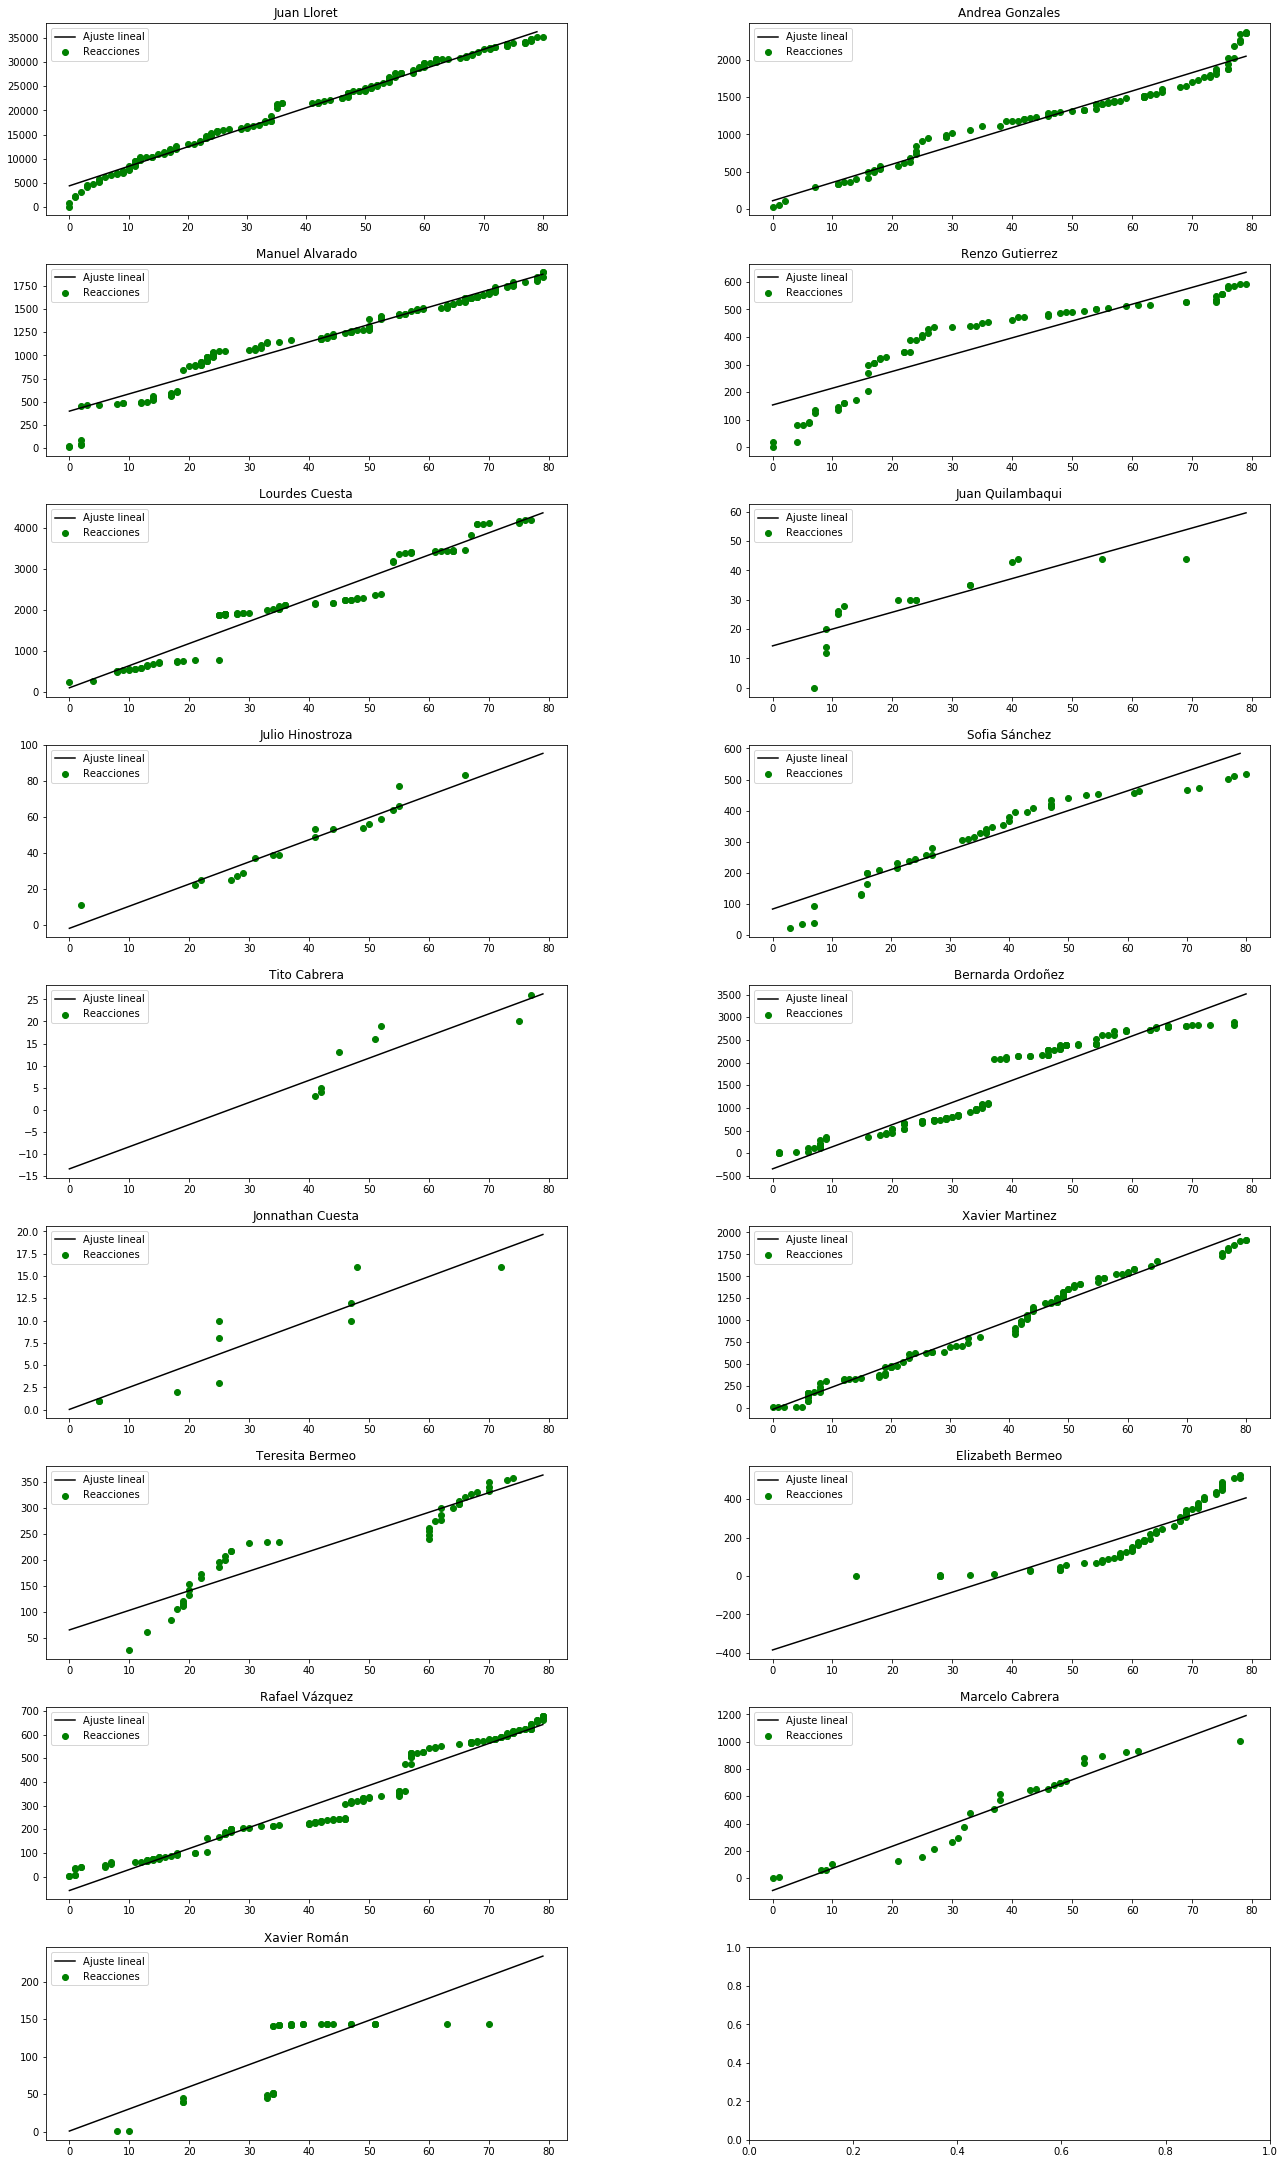

In [69]:
# Agregamos un fila de total casos nuevos
def obtener_total_reacciones(valores):
    total_reacciones = []
    for i, valor in enumerate(valores):
        if i > 0:
            nuevo_valor = total_reacciones[i-1] + valor
        else:
            nuevo_valor = valor
        total_reacciones.append(nuevo_valor)
    # retornamos la nueva lista
    return total_reacciones

dimension = len(ASAMBLEISTAS) if len(ASAMBLEISTAS) % 2 == 0 else len(ASAMBLEISTAS) + 1
fig, axs = plt.subplots(round(dimension / 2), 2, figsize=(20, 35))
conunt_axs = 0
actual_axs = 0

# recorre los datos de los asambleistas
for i, asambleista in enumerate(ASAMBLEISTAS):
    
    # Obtiene los datos del asambleista
    datos_asambleista = dataset[dataset['usuario'].isin([asambleista['usuario']])]
    
    # Obtiene las entradas
    x = list(datos_asambleista['numero_dia']) # Fecha
    y = obtener_total_reacciones(datos_asambleista['numero_reacciones']) # Numero de reacciones

    # Creamos el objeto de Regresión Lineal
    regresion = linear_model.LinearRegression()
    
    # Entrenamos nuestro modelo
    regresion.fit(np.array(x).reshape(-1, 1), y)
    x_real = np.array(range(0, 80))
    
    # Dibujamos la distribucion y pedicion de los datos
    axs[conunt_axs, actual_axs].set_title(asambleista['nombre'])
    axs[conunt_axs, actual_axs].scatter(x, y, lw=1.0, color = 'green')
    axs[conunt_axs, actual_axs].plot(x_real, regresion.predict(x_real.reshape(-1, 1)), color = 'black')
    axs[conunt_axs, actual_axs].legend(('Ajuste lineal', 'Reacciones'))
    
    # Actualiza los conts
    if (i + 1) % 2 == 0:
        conunt_axs += 1
        actual_axs = 0
    else:
        actual_axs += 1
        
    
# muestra las imagenes de la regresion
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

#### APLICAICON DE LA SIMULACION

In [70]:
# Importamos las librerias
import random
import simpy

In [105]:
RANDOM_SEED = 42
NUMERO_VOTANTES = 4  # Numero promedio de votantes que llegan al mismo tiempo
NUMERO_MESAS = 2     # Numero de mesas receptoras del voto disponibles en el recinto
TIEMPO_VOTACION = 5  # Tiempo promedio que las personas se demoran en votar
TIEMPO_LEGADA = 7    # Tiempo promedio de la llegada de las personas
SIM_TIME = 100     # Simulation time in minutes

In [107]:
TIEMPOS = []

In [108]:
class Recinto(object):
    """
        Clase recinto, encargado del proceso de votacion y administracion 
        de los recursos electorales
    """
    def __init__(self, env, numero_mesas, tiempo_votacion):
        self.env = env
        self.tiempo_votacion = tiempo_votacion
        self.mesas_electorales = simpy.Resource(env, numero_mesas)

    def votacion(self, votante):
        """
            Realiza el proceso de votacion.
        """
        yield self.env.timeout(self.tiempo_votacion)
        self.seleccion_candidato()
        # Espera la entrega del certificado
        timepo_cetificado = random.expovariate(1.0 / self.tiempo_votacion)
        yield env.timeout(timepo_cetificado)
        print(f'{votante} recibe su certificado votación a las {env.now}')
    
    def seleccion_candidato(self):
        """
            Realiza el proceso de la selecion del candidato
        """
        pass
        
        
def votante(env, name, recinto):
    """
        Metodo donde el votante hace uso de una mesa electoral y
        procede con la votacion
    """
    print(f'{name} llega a la mesa electoral y hace fila a las {env.now}')
    with recinto.mesas_electorales.request() as mesa:
        yield mesa

        print(f'{name} entra al proceso de votacion a las {env.now}.')
        yield env.process(recinto.votacion(name))
        print(f'{name} sale del recinto electoral a las {env.now}.')

def agregar_votantes(tiempo, votantes):
    cantidad = 0
    if len(TIEMPOS):
        cantidad = TIEMPOS[-1].get('cantidad')
    # Agrega los neuvo votantes
    TIEMPOS.append({'tiempo': tiempo, 'cantidad': cantidad + votantes})
    
def setup(env, num_mesas, time_votacion, time_llegada):
    """
        Creacion del recinto electoral, y el generado aleatorio 
        de personas que van a votar
    """
    # Crea el recinto electoral
    recinto = Recinto(env, num_mesas, time_votacion)
    # Create el ingreso de votantes a las mesas
    numero = 0
    while True:
        numero += 1
        votantes = random.randint(1, NUMERO_VOTANTES)
        # Crea un numero randomico de votantes
        for i in range(votantes):
            env.process(votante(env, f'PER[{numero}.{i+1}]', recinto))
        # Agrega el numero de botantes
        agregar_votantes(env.now, votantes)
        # Espera el tiempo de llegada
        yield env.timeout(random.randint(time_llegada - 5, time_llegada + 5))

In [109]:
print('VOTACIONES AZUAY - RECINTO #1')
random.seed(RANDOM_SEED)
env = simpy.Environment()
env.process(setup(env, NUMERO_MESAS, TIEMPO_VOTACION, TIEMPO_LEGADA))
# Execute!
env.run(until=SIM_TIME)

VOTACIONES AZUAY - RECINTO #1
PER[1.1] llega a la mesa electoral y hace fila a las 0
PER[1.1] entra al proceso de votacion a las 0.
PER[2.1] llega a la mesa electoral y hace fila a las 2
PER[2.2] llega a la mesa electoral y hace fila a las 2
PER[2.3] llega a la mesa electoral y hace fila a las 2
PER[2.1] entra al proceso de votacion a las 2.
PER[1.1] recibe su certificado votación a las 6.262930928350568
PER[1.1] sale del recinto electoral a las 6.262930928350568.
PER[2.2] entra al proceso de votacion a las 6.262930928350568.
PER[3.1] llega a la mesa electoral y hace fila a las 7
PER[2.1] recibe su certificado votación a las 13.748226001483626
PER[2.1] sale del recinto electoral a las 13.748226001483626.
PER[2.3] entra al proceso de votacion a las 13.748226001483626.
PER[2.2] recibe su certificado votación a las 15.204249695119
PER[2.2] sale del recinto electoral a las 15.204249695119.
PER[3.1] entra al proceso de votacion a las 15.204249695119.
PER[4.1] llega a la mesa electoral y hac

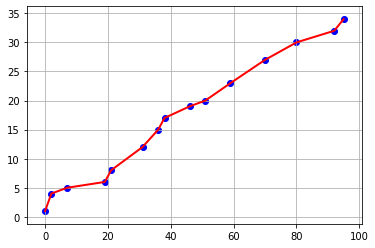

In [112]:
tiempos = pd.DataFrame(TIEMPOS)
plt.plot(tiempos['tiempo'], tiempos['cantidad'], linewidth=2,color='red')
plt.scatter(tiempos['tiempo'], tiempos['cantidad'], color='blue')
plt.grid(True)
plt.show()

In [113]:
# IMPRESION DE RESULTADOS
print("TOTAL VOTANTES:",  TIEMPOS[-1]['cantidad'])
print("TIEMPO PROMEDIO ESPERA:",  tiempos['tiempo'].mean())

TOTAL VOTANTES: 34
TIEMPO PROMEDIO ESPERA: 43.13333333333333
